# Matrix Evaluation

In this module, you will learn about any matrices that is used to determine the performance of classification

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

np.random.seed(42)
sns.set(rc={"figure.figsize": (8, 8)})
sns.set_style("ticks")

### Dataset
To compare any different matrix, we will try [Breast Cancer Dataset](https://goo.gl/U2Uwz2) by sckit-learn in `dataset` module. This dataset is used to perform binary classification between two kind of cancer.

In [ ]:
data = load_breast_cancer()
print(data.DESCR[:760]) 

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

 


In [ ]:
print(f"Types of cancer (targets) are {data.target_names}")

Types of cancer (targets) are ['malignant' 'benign']


How about the dimension? we have **569 examples** and each example has **30 features**.  
the **target** is binary model (**0 and 1** for `malignant` and `benign` consecutively).   
`benign` would be the `positive` class, and `malignant` would be `negative` class.  
Short point:  
`0 untuk is_not_benign`  
`1 untuk is_benign`

In [ ]:
X = data.data  
y = data.target  
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")

Shape of features is (569, 30), and shape of target is (569,)


### Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42, stratify=y)

In [ ]:
y_train[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

### Training and predicting data

In this example, scikit's Support Vector Machines classifier is used to predict whether this cancer benign or not.
`SVC` classifier can be obtained by `sklearn.svm`.

In [ ]:
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

In [ ]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [ ]:
Now save the prediction results both as probability and as classes.  
**`y_preds`** is a **1D vector** of one of `{0, 1}` values, denoting predictions as malignant and benign, respectively.  
**`y_proba`** is a **2D vector**, where for each example, it contains a vector of length 2,  
`[prob. of malignant, prob. of benign]`

In [ ]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [ ]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [ ]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([0.99600796, 0.0948797 , 0.99998451, 0.96319115, 0.99999806]),
 array([1, 0, 1, 1, 1]),
 array([1, 0, 1, 1, 1]))

### Confusion Matrix

Then, the confusion matrix would be implemented to Scikit-learn's [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[ 68,   7],
       [  2, 123]])

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
conf = get_confusion_matrix(y_test, y_preds)
conf

array([[ 68,   7],
       [  2, 123]])

Text(0.5,83.88,'Predicted label')

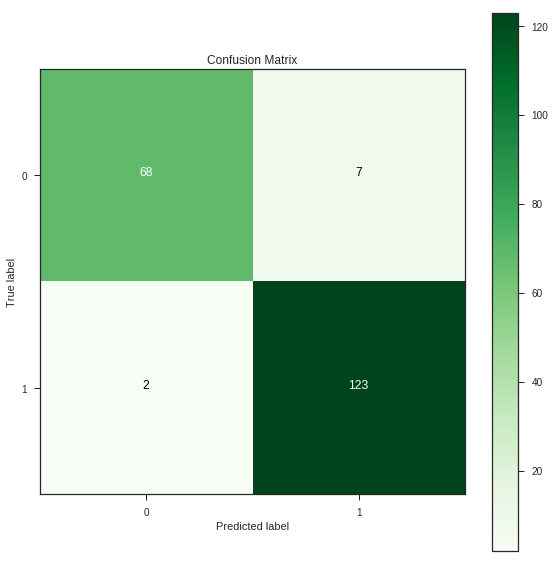

In [ ]:
classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Based on confusion matrix result, it can be seen that we have some numbers of data which are predicted correctly.
Shown as `True Positives, True Negatives, False Positives, and False Negatives` by confusion matrix.  

In [ ]:

TP = true_pos = 123
TN = true_neg = 68
FP = false_pos = 7
FN = false_neg = 2

### Some *basic metrics*

Some basic metrics will be measured by four values. It needs a dictionary to save the values by `results` dictionary.

In [ ]:
results = {}

#### Accuracy 
sample amount which are correctly predicted/sum of example amount  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [ ]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.955


#### True Positive Rate
 
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


In [ ]:

metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.984


#### True Negative Rate

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)


In [ ]:

metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.907


#### Positive Predictive Value
 
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)


In [ ]:

metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.946


#### Negative Predictive Value
  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6da0f59faffbc1704974e97847ab4fa599f5521)


In [ ]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  0.971


#### F1 score
 Harmonic average of Precision dan Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.965


#### Matthew's correlation coefficient
Matthew's coefficient consists of `[-1, 1]`. `0` means the prediction result is random. `1` means perfect classifier, also negative value (`[-1, 0)`) shows negative correlation between predicted and actual value.   

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5caa90fc15105b74b59a30bbc9cc2e5bd43a13b7)

In [ ]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.904


### Comparing metrics results

In [ ]:
print(f"Calculated dan Actual Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test, y_preds): .3f}")
print(f"Calculated dan Actual Matthew's correlation coefficient: {results['MCC']: .3f}, {metrics.matthews_corrcoef(y_test, y_preds): .3f}")

Calculated and Actual Accuracy:                           0.955,  0.955
Calculated and Actual Precision score:                    0.946,  0.946
Calculated and Actual Recall score:                       0.984,  0.984
Calculated and Actual F1 score:                           0.965,  0.965
Calculated and Actual Matthew's correlation coefficient:  0.904,  0.904


### ROC curve (Receiver Operating Characteristic curve)
   


In [ ]:
def get_roc_curve(y_test, y_proba, delta=0.1):

    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [ ]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(y_test, y_proba, delta)

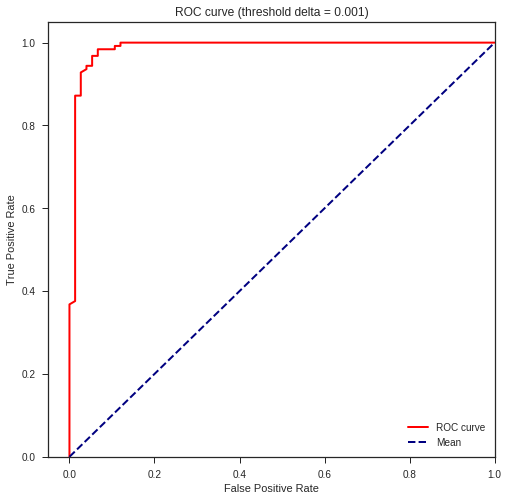

In [ ]:

plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [ ]:

rand_proba = np.random.random(size=(y_proba.shape))
rand_proba[:5] 

array([0.79654299, 0.18343479, 0.779691  , 0.59685016, 0.44583275])

In [ ]:
FPRs, TPRs, _ = get_roc_curve(y_test, rand_proba, delta)  

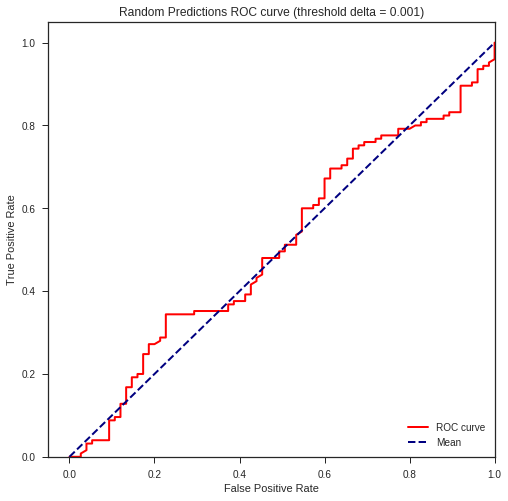

In [ ]:

plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Predictions ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

In [ ]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

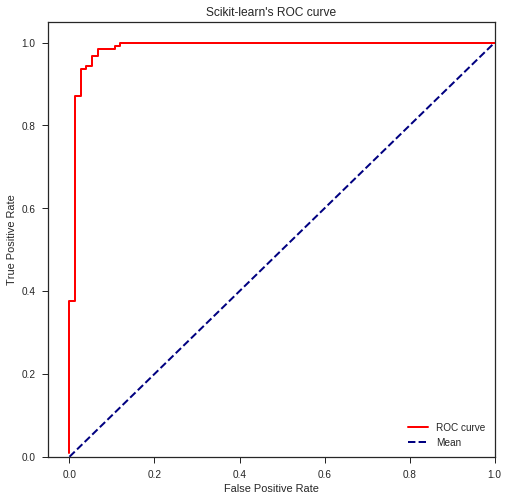

In [ ]:

plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, rand_proba) 

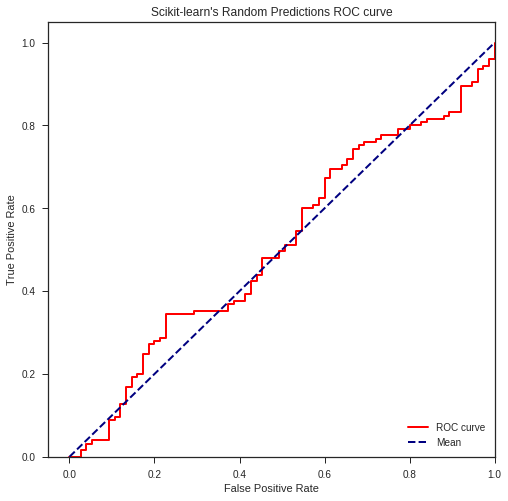

In [ ]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's Random Predictions ROC curve")
plt.legend(loc="lower right")
plt.show()

### ROC-AUC score
Now, that we know about ROC curve, what it represents, **AUC score** is very easy to understand.  
AUC stands for **Area under the Curve**, which is nothing but the area under the ROC curve formed by the predictions.  
As we saw, a totally random prediction will have AUC score `0.5`, while a perfect classifier will have AUC score of `1`. 

In [ ]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9872


In [ ]:
def get_roc_auc_score(y_test, y_proba):
    
    FPRs, TPRs, _ = get_roc_curve(y_test, y_proba)
    FPRs.reverse()
    TPRs.reverse()
    x1, y1 = FPRs[0], TPRs[0]
    auc = 0.0
    prev = 0.0

    diffs = [FPRs[i] - FPRs[i-1] for i in range(1, len(FPRs))]
    for x, y in zip(diffs, TPRs[1:]):
        auc += (x * y1)
        auc += (x * (y - y1)/2) 
        y1 = y
    return auc

In [ ]:
auc_score = get_roc_auc_score(y_test, y_proba)
print(f"ROC-AUC score dari SVC model adalah {auc_score: .4f}")

Our ROC-AUC score of SVC model is  0.9870


In [ ]:
auc_score = metrics.roc_auc_score(y_test, rand_proba)
print(f"Scikit's ROC-AUC score dari random predictions adalah: {auc_score: .4f}")
auc_score = get_roc_auc_score(y_test, rand_proba)
print(f"ROC-AUC score dari random predictions adalah:      {auc_score: .4f}")

Scikit's ROC-AUC score of random predictions is:  0.5111
Our ROC-AUC score of random predictions is:       0.5080
